B  D   -0.932786
D  B   -0.932786
B  C   -0.860941
C  B   -0.860941
A  C   -0.701886
C  A   -0.701886
A  D   -0.267793
D  A   -0.267793
A  B    0.518457
B  A    0.518457
C  D    0.624851
D  C    0.624851
A  A    1.000000
B  B    1.000000
C  C    1.000000
D  D    1.000000
dtype: float64

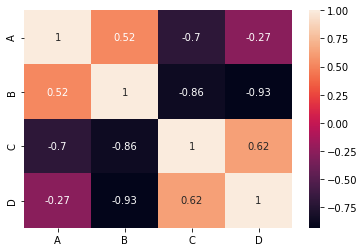

In [4]:
from pandas import DataFrame
import seaborn as sn

Data = {'A': [45,37,42,35,39],
        'B': [38,31,26,28,33],
        'C': [10,15,17,21,12],
        'D': [1,2,3,2,np.nan]
        }

dfteste = DataFrame(Data,columns=['A','B','C', 'D'])

corrMatrix = dfteste.corr()
sn.heatmap(corrMatrix, annot=True)
corrMatrix.unstack().sort_values()

In [6]:
#Transforma excel em csv
import pandas as pd
import numpy as np
import os

ativos = []
for f in os.listdir():
    name, ext = os.path.splitext(f)
    if ext == '.xlsx':
        ativos.append(name + ext)
        
for ativo in ativos:
    print(ativo)
    df_temp = pd.read_excel(ativo, header=3)
    df_temp.rename(columns={"Volume$": "Volume"}, inplace=True)
    df_temp_date = df_temp["Data"]
    df_temp.drop(["Data", "Q Negs", "Q Títs"], inplace=True, axis=1)
    df_temp = df_temp.replace("-", np.nan)
    df_temp = df_temp.astype(float)
    df_temp.insert(0, "Data", df_temp_date)
    df_temp.dropna(inplace=True)
    df_temp.to_csv(ativo[:-5]+".csv", index=False)
    os.system("rm {}".format(ativo))
    

__varCorr.xlsx


KeyError: 'Data'

In [ ]:
#Cria um csv de todos os ativos
import pandas as pd
import numpy as np
import os

ativos = []
for f in os.listdir():
    name, ext = os.path.splitext(f)
    if ext == '.csv':
        ativos.append(name + ext)
ativos.remove("__main.csv")    
ativos.sort()
df_main = pd.DataFrame()
for ativo in ativos:
    df_temp = pd.read_csv(ativo)
    df_temp.insert(0, "Ativo", ativo[:-4])
    df_temp["Variacao"] = df_temp.apply(lambda row: 0, axis=1)
    for day in range(1, df_temp.shape[0]):
        closeT0 = df_temp["Fechamento"].iloc[day-1]
        closeT1 = df_temp["Fechamento"].iloc[day]
        df_temp["Variacao"].iloc[day] = (closeT1/closeT0) -  1
    print(ativo, df_temp.shape, df_main.shape)
    if df_main.shape == (0,0):
        df_main = df_temp
    df_main = pd.concat([df_main, df_temp])

#df_main.to_csv("__main.csv", index=False)

In [10]:
import pandas as pd
import numpy as np

df_main = pd.read_csv("__main.csv")
max_ativo_len = df_main.groupby("Ativo").count().max()
ativos = df_main["Ativo"].unique()
df_variacao = pd.DataFrame()
for ativo in ativos:
    df_temp = df_main[df_main.Ativo == ativo]["Variacao"]
    ativo_len = df_temp.shape[0]
    to_complete = max_ativo_len - ativo_len
    variacao_list = df_temp.to_list()
    variacao_list.extend([np.nan] * to_complete)
    df_temp = pd.DataFrame({ativo: [*variacao_list]})
    if df_variacao.shape == (0, 0):
        df_variacao = df_temp
    else:
        df_variacao[ativo] = df_temp
        
df_variacao.to_excel("__Variacao.xlsx")

In [36]:
varCorr = df_variacao.corr()

In [37]:
varCorr["PETR4"]["GOLL4"]

0.03315152605582095

In [38]:
varCorr = varCorr.unstack().sort_values()

In [39]:
varCorr = varCorr[varCorr < 1].drop_duplicates()

In [40]:
varCorr

BMGB11  FRAS3    -0.697193
        SAPR11   -0.694038
PTBL3   BMGB11   -0.552396
PDGR3   BMGB4    -0.473866
BMGB11  SANB4    -0.453914
                    ...   
EUCA4   RPMG3     0.688233
RNEW4   DMMO3     0.801436
CMIG3   LREN3     0.822006
EUCA4   DMMO3     0.833180
RNEW4   EUCA4     0.865491
Length: 19110, dtype: float64

In [41]:
varCorr.to_excel("__varCorr_Sorted.xlsx")

In [ ]:
#Alguns dados em grafico
plt.subplots(figsize=(20,15))
sn_plot = sn.heatmap(varCorr, annot=True)
figure = sn_plot.get_figure()
figure.savefig('__OUTPUT3.png', dpi=400)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os


ativos = []
ativos_filename = []

for f in os.listdir():
    name, ext = os.path.splitext(f)
    if ext == '.csv':
        ativos.append(name)
        ativos_filename.append(name + ext)

ativos.sort()
for ativo, ativo_filename in zip(ativos, ativos_filename):
    df_ativo = pd.read_csv(ativo_filename)
    df_ativo["Ano"] = df_ativo.apply(lambda row: str(row.Data[:4]), axis=1)
    close = df_ativo.Fechamento.to_list()
    close.reverse()
    year = [x for x in range(df_ativo.shape[0], 0, -1)]
    sb.lineplot(x=year, y=close)
    sb_plot = sb.lineplot(x=year, y=close)
    plt.savefig("../graphs/{}.png".format(ativo), dpi=260)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
#Cotação da ambev veio estranha
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from os import listdir

df = pd.read_excel("ABEV3.xlsx")
df.rename(columns={"Volume$": "Volume"}, inplace=True)
col = list(df.columns)
print(col)
col.remove("Data")
col.remove("Q Negs")
col.remove("Q Títs")
df[col] = df[col].replace("-", np.nan)
df.dropna(inplace=True)
df[col].astype(float)
col.insert(0, "Data")
df = df[df.Data > '2014-11-14']
df = df[col]
#df['Data'] = df['Data'].dt.date para data ficar bonita no excel
df.sort_values("Fechamento")

In [ ]:
ativos = listdir()

In [ ]:
#Filtro ABEV
df = pd.read_excel("ABEV3.xlsx", header=3)
df.rename(columns={"Volume$": "Volume"}, inplace=True)
col = list(df.columns)
print(col)
col.remove("Data")
col.remove("Q Negs")
col.remove("Q Títs")
df[col] = df[col].replace("-", np.nan)
df.dropna(inplace=True)
df[col].astype(float)
col.insert(0, "Data")
df = df[df.Data > '2014-11-14']
df = df[col]
#df['Data'] = df['Data'].dt.date para data ficar bonita no excel
df.sort_values("Fechamento")